# Exercício 4

Considere agora uma função bidimensional $U(\vec{r})= U(x,y) = ( sin(x)cos(y) + 2(xy)^2 )/1000$. A função tem multiplos mínimos locais. A vizualiação 3D dos passos neste caso pode ser dificil de interpretar. Então, neste caso, para acompanhar a evolução do algoritmo, faça dois gráficos:

- a. Um gráfico de contorno (use `plt.imshow` ou `plt.pcolormesh`) da função $U(x,y)$ e desenhe a trajetória da partícula no gráfico.

- b. Faça um gráfico do valor de $U(x_n,y_n)$ a cada passo como função das iterações (passos) $n$. No contexto de redes neurais chamaremos estes passos de epochs.

Varie a posição inicial $(x_0,y_0)$ e a taxa de aprendizado $\alpha$ e veja como isso afeta a convergência do algoritmo. 

O que acontece se você aumentar muito a taxa de aprendizado? E se você diminuir muito? Você consegue atingir o mínimo global?

---

Precisamos definir a nossa função $U(x)$ e sua derivada $dU(x)$:

$$ U(x,y)=  sin(x)cos(y) + \frac{2(xy)^2}{1000} $$

$$ d_x U(x,y) = cos(x)cos(y)+\frac{4xy^2}{1000}$$

$$ d_y U(x,y) = -sin(x)sin(y)+\frac{4yx^2}{1000}$$

Nesse caso, existem múltiplos mínimos 

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos a função potencial U(x,y), que queremos minimizar
def U(x,y):
    return np.sin(x) * np.cos(y) + (2*(x*y)**2)/ 1000

In [3]:
# Derivada parcial de U(x,y) em relação a x, que representa o gradiente da função na direção x
def dxU(x,y):
    return np.cos(y) * np.cos(x) + (4*x*(y**2)) / 1000

In [4]:
# Derivada parcial de U(x,y) em relação a y, que representa o gradiente da função na direção y
def dyU(x,y):
    return 0- np.sin(x) * np.sin(y) + (4*y*(x**2)) / 1000

In [5]:
# Função que implementa o algoritmo de gradiente descendente
# Esse algoritmo simula uma partícula se movendo na função U(x,y), parando no mínimo local
def gradiente(dxU, dyU, x0, y0, alpha=0.1, eps=0.01, max=1000):
    x=x0 # posição inicial em x
    y=y0 # posição inicial em y
    lista = [[x,y]] # armazena as posições da partícula
# atualiza as coordenas com base no gradiente
    for _ in range(max):
        x1=x-alpha*dxU(x,y) 
        y1=y-alpha*dyU(x,y)
        lista.append([x1,y1]) # salva a nova posição
        if abs(x1-x)<eps and abs(y1-y)<eps: # critério de parada baseado na variação 
            break
        x=x1 # atualiza x
        y=y1 # atualiza y
    return np.array(lista) # retorna a lista de posições que define a sua trajetória

In [6]:
# Geração de pontos para desenhar a curva da função U(x,y)
eixo_x=np.linspace(-3, 3, 200)
eixo_y=np.linspace(-3, 3, 200)

X,Y = np.meshgrid(eixo_x,eixo_y)  #cria a grade bidimensional para o gráfico 
Z = U(X,Y) #calcula U(x,y) para cada ponto da grade 

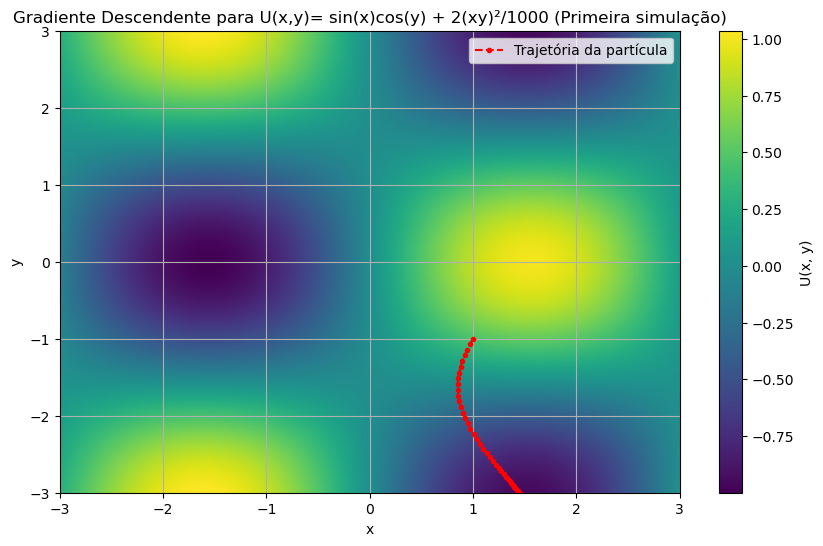

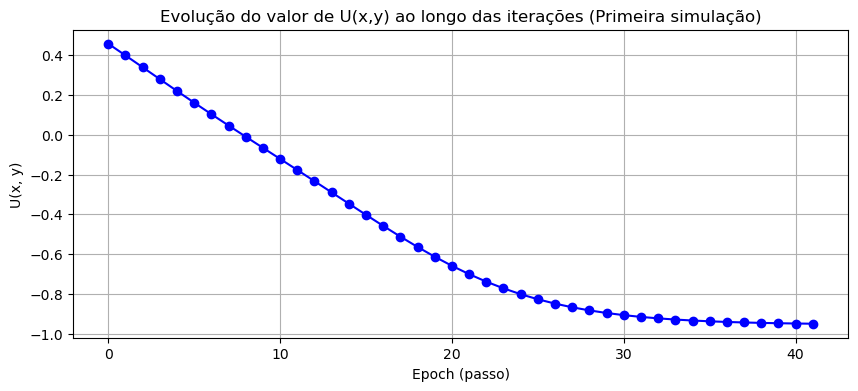

In [22]:
#===========================
# Primeira simulação
#===========================
# Parâmetros: posição inicial, taxa de aprendizado, tolerância e máximo de iterações
x0=1
y0=-1
alpha=0.1
eps=0.01
maximo=1000

# Simula o movimento da "partícula" na função potencial U(x,y)
caminho=gradiente(dxU, dyU, x0, y0, alpha, eps, maximo)
xs, ys = caminho[:, 0], caminho[:, 1] #extrai os pontos da trajetória (x,y)

# Plot da função e trajetória da partícula
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=[eixo_x.min(), eixo_x.max(), eixo_y.min(), eixo_y.max()], origin='lower', cmap='viridis', aspect='auto')  # gera o mapa de cores da função
plt.plot(xs, ys, 'r.--', label='Trajetória da partícula')  # Trajetória
plt.colorbar(label='U(x, y)') # barra de cores indicando os valores de U(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.title('Gradiente Descendente para U(x,y)= sin(x)cos(y) + 2(xy)²/1000 (Primeira simulação)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico do valor da função ao longo das iterações
valores_U = [U(x, y) for x, y in caminho]  # calcula U(x,y) para cada ponto do caminho

plt.figure(figsize=(10, 4))
plt.plot(valores_U, 'bo-')  # gera os valores de U(x,y) ao longo do tempo
plt.xlabel('Epoch (passo)')
plt.ylabel('U(x, y)')
plt.title('Evolução do valor de U(x,y) ao longo das iterações (Primeira simulação)')
plt.grid(True)
plt.show()

Para a taxa de aprendizado $\alpha=0,1$ , observa-se uma trajetória suave e bem comportada da partícula ao longo do gradiente da função. O caminho seguido mostra uma descida progressiva até um ponto de mínimo local, sem oscilações abruptas. 

No gráfico da evolução da função $U(x,y)$ ao longo das iterações, é possível perceber uma redução constante e rápida do valor da função até a estabilização em torno de 40 iterações. 

Isso indica que esse valor de $\alpha$ proporciona um bom equilíbrio entre velocidade de convergência e estabilidade numérica, sendo, portanto, uma escolha bastante eficiente.

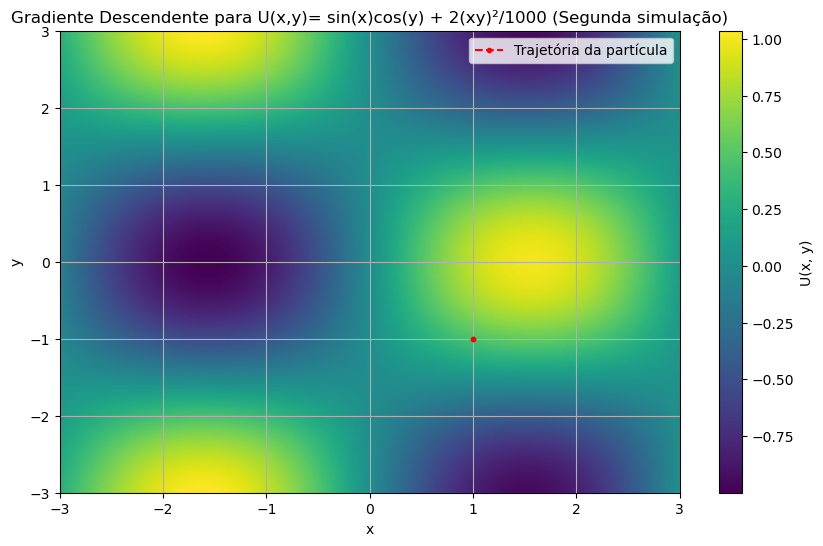

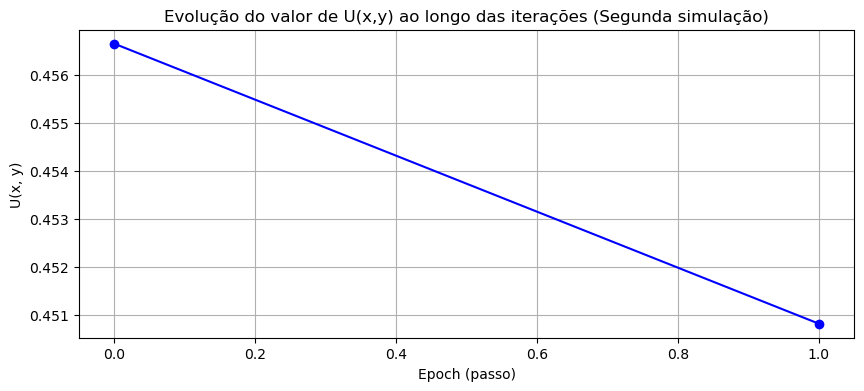

In [24]:
#===========================
# Segunda simulação
#===========================
# Parâmetros: posição inicial, taxa de aprendizado, tolerância e máximo de iterações
x0=1
y0=-1
alpha=0.01
eps=0.01
maximo=1000

# Simula o movimento da "partícula" na função potencial U(x,y)
caminho=gradiente(dxU, dyU, x0, y0, alpha, eps, maximo)
xs, ys = caminho[:, 0], caminho[:, 1] #extrai os pontos da trajetória (x,y)

# Plot da função e trajetória da partícula
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=[eixo_x.min(), eixo_x.max(), eixo_y.min(), eixo_y.max()], origin='lower', cmap='viridis', aspect='auto')  # gera o mapa de cores da função
plt.plot(xs, ys, 'r.--', label='Trajetória da partícula')  # Trajetória
plt.colorbar(label='U(x, y)') # barra de cores indicando os valores de U(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.title('Gradiente Descendente para U(x,y)= sin(x)cos(y) + 2(xy)²/1000 (Segunda simulação)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico do valor da função ao longo das iterações
valores_U = [U(x, y) for x, y in caminho]  # calcula U(x,y) para cada ponto do caminho

plt.figure(figsize=(10, 4))
plt.plot(valores_U, 'bo-')  # gera os valores de U(x,y) ao longo do tempo
plt.xlabel('Epoch (passo)')
plt.ylabel('U(x, y)')
plt.title('Evolução do valor de U(x,y) ao longo das iterações (Segunda simulação)')
plt.grid(True)
plt.show()

Quando a taxa de aprendizado é reduzida para $\alpha=0,01$ , o comportamento do algoritmo se torna consideravelmente mais lento. A trajetória da partícula apresenta passos muito pequenos, o que faz com que a partícula ainda esteja longe do mínimo mesmo após várias iterações. 

O gráfico da função $U(x,y)$ mostra uma queda lenta e gradual, sugerindo que o algoritmo está estável, mas pouco eficiente. 

Esse valor de $\alpha$ é seguro em termos de estabilidade, porém acaba sendo ineficiente para simulações que requerem resultados em um número razoável de passos.

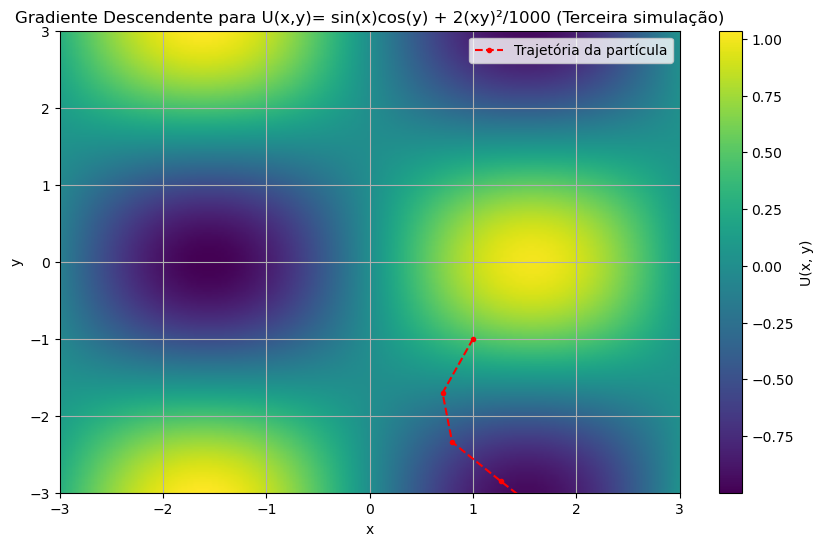

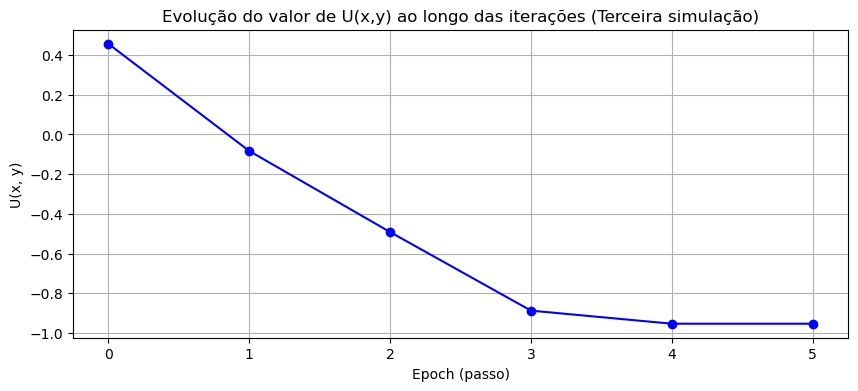

In [ ]:
#===========================
# Terceira simulação
#===========================
# Parâmetros: posição inicial, taxa de aprendizado, tolerância e máximo de iterações
x0=1
y0=-1
alpha=1
eps=0.01
maximo=1000

# Simula o movimento da "partícula" na função potencial U(x,y)
caminho=gradiente(dxU, dyU, x0, y0, alpha, eps, maximo)
xs, ys = caminho[:, 0], caminho[:, 1] #extrai os pontos da trajetória (x,y)

# Plot da função e trajetória da partícula
plt.figure(figsize=(10, 6))
plt.imshow(Z, extent=[eixo_x.min(), eixo_x.max(), eixo_y.min(), eixo_y.max()], origin='lower', cmap='viridis', aspect='auto')  # gera o mapa de cores da função
plt.plot(xs, ys, 'r.--', label='Trajetória da partícula')  # Trajetória
plt.colorbar(label='U(x, y)') # barra de cores indicando os valores de U(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.title('Gradiente Descendente para U(x,y)= sin(x)cos(y) + 2(xy)²/1000 (Terceira simulação)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico do valor da função ao longo das iterações
valores_U = [U(x, y) for x, y in caminho]  # calcula U(x,y) para cada ponto do caminho

plt.figure(figsize=(10, 4))
plt.plot(valores_U, 'bo-')  # gera os valores de U(x,y) ao longo do tempo
plt.xlabel('Epoch (passo)')
plt.ylabel('U(x, y)')
plt.title('Evolução do valor de U(x,y) ao longo das iterações (Terceira simulação)')
plt.grid(True)
plt.show()

Ao utilizar uma taxa de aprendizado maior, $\alpha=0,9$, o algoritmo converge rapidamente ao mínimo, mas a trajetória apresenta mudanças abruptas e não suaves, sugerindo que, embora o ponto atinja o mínimo com poucas iterações, existe um risco maior de instabilidade.

No gráfico da função $U(x,y)$, apesar da queda rápida nos valores, a oscilação nas direções do gradiente pode ser um indicativo de que o método, com um $\alpha$ tão elevado, está no lmite da estabilidade.

# Análise final
---

A comparação mostra que valores muito baixos de $\alpha$ resultam em lentidão excessiva, enquanto valores muito altos podem comprometer a suavidade e estabilidade do processo. O valor intermediário de $\alpha=0,1$ oferece o melhor equilíbrio entre velocidade de convergência e estabilidade, sendo o mais apropriado para essa aplicação.